## 多层感知机

### 3.激活函数

In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

#### 3.1 sigmoid

将输入软投影到(0,1)，$sigmoid(x) = \frac{1}{1+exp(-x)}$

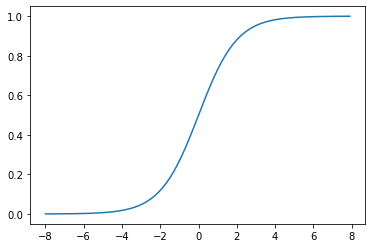

In [4]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
plt.plot(x.detach(), y.detach())

导数：$\frac{d}{dx}sigmoid(x) = \frac{exp(-x)}{(1+exp(-x))^2} = sigmoid(x)(1-sigmoid(x))$

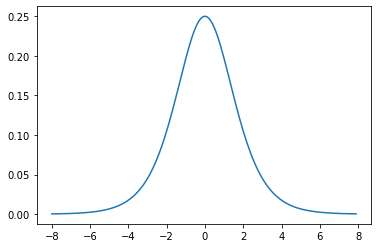

In [6]:
y.backward(torch.ones_like(x),retain_graph=True)
plt.plot(x.detach(), x.grad)

#### 3.2 tanh

将输入软压缩到(-1,1)，$tanh(x) = \frac{1-exp(-2x)}{1+exp(-2x)}$

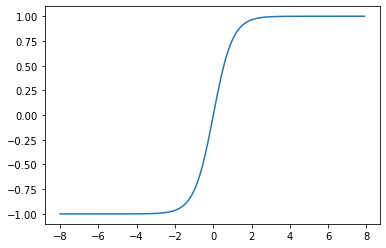

In [7]:
y = torch.tanh(x)
plt.plot(x.detach(), y.detach())

导数：$\frac{d}{dx}tanh(x) = \frac{4exp(-2x)}{(1+exp(-2x))^2} = 1-(tanh(x))^2$

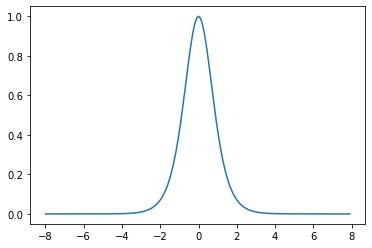

In [8]:
# 清除以前的梯度
x.grad.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
plt.plot(x.detach(), x.grad)

#### 3.3 ReLU

$ReLU(x) = max(0, x)$，好处在于不需要指数运算，快，而且方便求导。

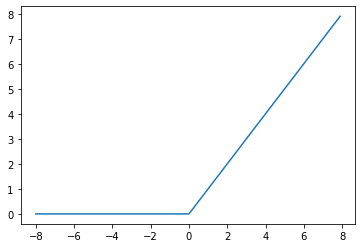

In [10]:
y = torch.relu(x)
plt.plot(x.detach(), y.detach())

- 当输入为负时，ReLU函数的导数为0，而当输入为正时，ReLU函数的导数为1。
- 注意，当输入值精确等于0时，ReLU函数不可导。 在此时，我们默认使用左侧的导数，即当输入为0时导数为0。
- 我们可以忽略这种情况带来的影响，因为输入可能永远都不会是0。

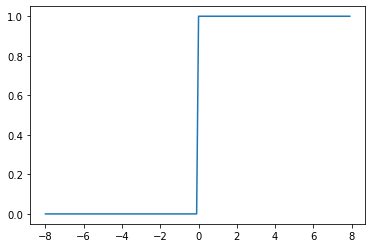

In [11]:
# 清除前面的梯度，因为会默认累积
x.grad.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
plt.plot(x.detach(), x.grad)

### 4.从softmax到多层感知机

多类分类问题，如果没有隐含层引入非线性，则为softmax回归；如果加入隐含层，则为多层感知机。

#### 4.1用于多类分类的MLP

- 输入：$X\in \mathbb{R}^n$；
- 隐藏层：$W_1 \in \mathbb{R}^{m*n}，b_1\in \mathbb{R}$，$\sigma$为按元素的激活函数；$h = \sigma(W_1X+b_1)$；
- 输出层：$W_2 \in \mathbb{R}^{k*m}，b_2\in \mathbb{R}^k$；$o = W_2h+b_2$
- $y = softmax(o)$

#### 4.2多隐藏层

超参数：隐藏层数目、每层隐藏层的大小

例如
$$
\begin{aligned}
h_1 &= \sigma(W_1X+b_1) \\
h_2 &= \sigma(W_2h_1+b_2) \\
h_3 &= \sigma(W_3h_2+b_3) \\
o &= W_4h_3 + b
\end{aligned}
$$

### 5.小结

- 多层感知机使用隐藏层和激活函数，来引入非线性
- 常用激活函数是sigmoid、tanh、relu
- 使用softmax来处理多类分类
- 超参数为隐藏层数，和各个隐藏层的大小

### 6.练习

- pReLU：
  
  ![img](https://img-blog.csdn.net/20160508143448263)